# 연합뉴스 타이틀 주제 분류 데이터 탐색과 시각화
데이터셋 출처 
* [뉴스 토픽 분류 AI 경진대회 - DACON](https://dacon.io/competitions/official/235747/overview/description)
* [KLUE Benchmark](https://klue-benchmark.com/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

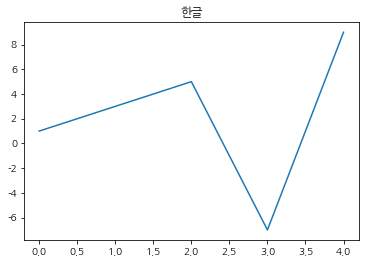

In [2]:
# 한글폰트 동작 확인
pd.Series([1,3,5,-7,9]).plot(title='한글');

## 데이터 로드

In [3]:
train = pd.read_csv('../data/klue/train_data.csv')
test = pd.read_csv('../data/klue/test_data.csv')

print(train.shape, test.shape)
display(train.head())
display(test.head())

(45654, 3) (9131, 2)


,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [4]:
topic = pd.read_csv('../data/klue/topic_dict.csv')

print(topic.shape)
display(topic)

(7, 2)


,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [5]:
# 데이터 합치기
df = pd.concat([train, test])
df = df.merge(topic, how='left')

print('shape:', df.shape)
display(df)

shape: (54785, 4)


,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계
...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN


## 정답값 빈도수
* train 에서 제공하는 정답값의 빈도수

In [6]:
df['topic_idx'].value_counts()  # test는 topic_idx가 결측치로 돼 있기 때문에 포함 안 됨

4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: topic_idx, dtype: int64

In [7]:
df['topic'].value_counts()

세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: topic, dtype: int64

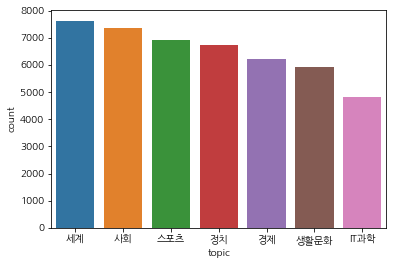

In [8]:
sns.countplot(data=df, x='topic', order=df['topic'].value_counts().index);  # test는 topic이 결측치로 돼 있기 때문에 포함 안 됨

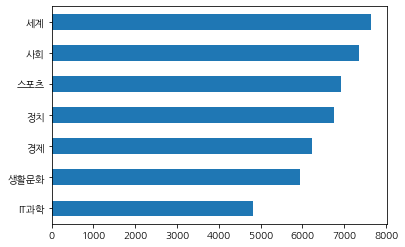

In [9]:
df['topic'].value_counts().sort_values().plot.barh();

## 문자 길이


|| Series | DataFrame | 사용 예 |
|---|---|---|---|
|map|O|X|df[“컬럼명”].map(함수 or dict)|
|apply|O|O|df.apply(함수) <br/> df[“컬럼명”].apply(함수)|
|applymap|X|O|df.applymap(함수)|

In [10]:
#  파생변수: 문자 수, 단어 수
df['len'] = df['title'].str.len()
df['word_count'] = df['title'].map(lambda x : len(x.split()))
df['unique_word_count'] = df['title'].map(lambda x : len(set(x.split())))

df.head(2)

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6


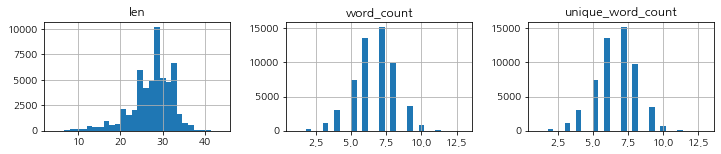

In [11]:
# 파생변수 시각화
df[['len', 'word_count', 'unique_word_count']].hist(bins=30, layout=(1,3), figsize=(12,2));

In [12]:
# 기술통계값
df[['len', 'word_count', 'unique_word_count']].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


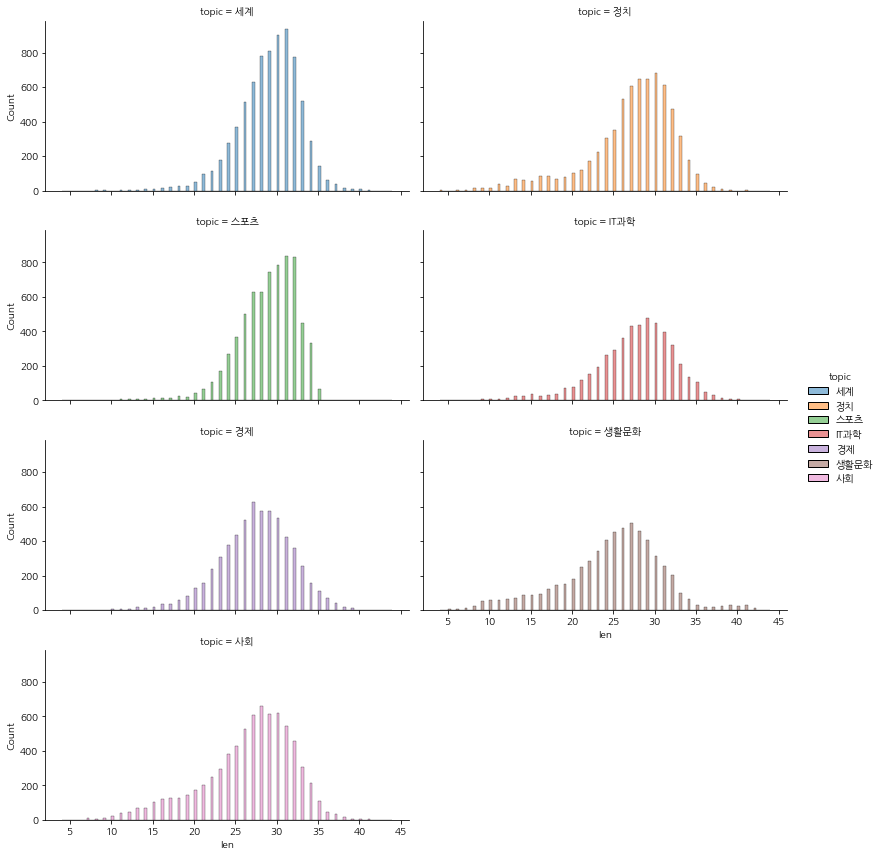

In [13]:
# 'topic' 별 'len'(문장길이) 시각화
sns.displot(data=df, x='len', hue='topic', kind='hist', col='topic', col_wrap=2, aspect=15/8, height=3);

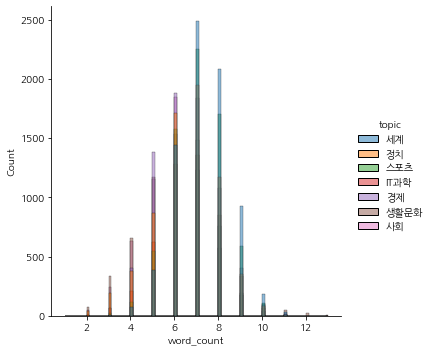

In [14]:
# 'topic' 별 'word_count'(단어수) 시각화
sns.displot(data=df, x='word_count', hue='topic', kind='hist');

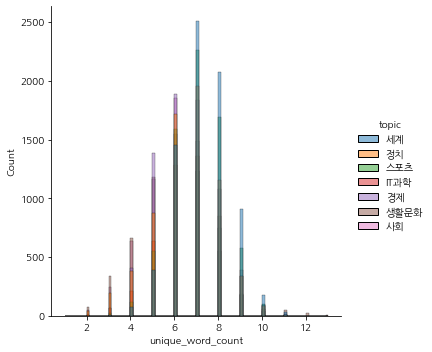

In [15]:
# topic 별 'unique_word_count' 시각화
sns.displot(data=df, x='unique_word_count', hue='topic', kind='hist');

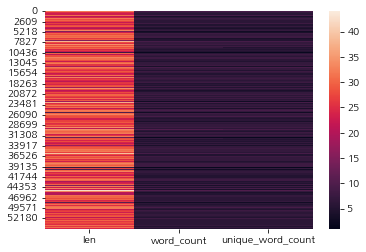

In [16]:
# heatmap 을 통한 "len", "word_count", "unique_word_count" 시각화
sns.heatmap(df[['len', 'word_count', 'unique_word_count']]);

## 문자 전처리
### 숫자 제거 (연습)

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


In [17]:
import re

In [18]:
# 연습
re.sub('[0-9]', '', '구글 15조원')

'구글 조원'

In [19]:
# map, 정규표현식의 re.sub 을 통해 숫자제거
df["title"].map(lambda x : re.sub('[0-9]', '', x))

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

In [20]:
# 판다스의 str.replace 기능을 통해 제거
df["title"] = df['title'].str.replace('[0-9]', '', regex=True)
df['title']

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

### 특수 문자 제거 (연습)

In [21]:
# 특수 문자 제거 시 구두점 참고
import string

punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# 연습
re.sub(f'[{punct}]', '', '구글 15/./조원')

'구글 15조원'

In [23]:
# 특수 문자 사용시 정규표현식에서 메타 문자로 특별한 의미를 갖기 때문에 역슬래시를 통해 예외처리를 해주어야 한다
# [!\"\$\*] 일부 특수문자 제거 연습
df['title'] = df["title"].map(lambda x : re.sub(f'[{punct}]', '', x))
df['title']

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780              인천 오후 시분 대설주의보…눈 cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

In [24]:
# str.replace로도 가능
df['title'] = df['title'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', regex=True)
df['title']

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780              인천 오후 시분 대설주의보…눈 cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

### 영문자는 모두 소문자로 변경
* 대소문자가 섞여 있으면 다른 다른 단어로 다루기 때문

In [25]:
df['title'] = df['title'].str.lower()
df['title']

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780              인천 오후 시분 대설주의보…눈 cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

### 한글, 영문과 공백만 남기고 모두 제거

In [26]:
# 한글과 공백만 남기고 제거: [^ㄱ-ㅎㅏ-ㅣ가-힣 ]
df["title"] = df["title"].map(lambda x : re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', x))

In [27]:
# str.replace로도 가능
df['title'] = df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', regex=True)
df['title']

0                인천핀란드 항공기 결항휴가철 여행객 분통
1            실리콘밸리 넘어서겠다구글 조원 들여 전역 거점화
2        이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3            클린턴 측근기업 특수관계 조명공과 사 맞물려종합
4             시진핑 트럼프에 중미 무역협상 조속 타결 희망
                      ...              
54780               인천 오후 시분 대설주의보눈  쌓여
54781     노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782         년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑 아프리카개발은행 총회 개회식 생중계
54784    유영민 과기장관 강소특구는 지역 혁신의 중심지원책 강구
Name: title, Length: 54785, dtype: object

### 공백 여러 개는 하나로

In [28]:
# 공백 여러 개 전처리 예시
re.sub('[\s]+', ' ', '공백             전처리')

'공백 전처리'

In [29]:
# 여러 개의 공백을 하나의 공백으로 치환
df['title'] = df['title'].map(lambda x : re.sub('[\s]+', ' ', x))

### 불용어 제거

In [30]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다', 
             '그리고', '입니다', '그', '등', '이런', '및','제', '더', '시분']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [31]:
# 연습
stops = '항공기'
tokens = '인천핀란드 항공기 결항휴가철 여행객 분통'.split()
' '.join([w for w in tokens if not w in stops])

'인천핀란드 결항휴가철 여행객 분통'

In [32]:
# map을 사용하여 불용어 제거하기
df['title'] = df['title'].map(remove_stopwords)
df['title']

0                인천핀란드 항공기 결항휴가철 여행객 분통
1            실리콘밸리 넘어서겠다구글 조원 들여 전역 거점화
2        이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3            클린턴 측근기업 특수관계 조명공과 사 맞물려종합
4             시진핑 트럼프에 중미 무역협상 조속 타결 희망
                      ...              
54780                   인천 오후 대설주의보눈 쌓여
54781     노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782         년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑 아프리카개발은행 총회 개회식 생중계
54784    유영민 과기장관 강소특구는 지역 혁신의 중심지원책 강구
Name: title, Length: 54785, dtype: object

## 워드클라우드

* https://github.com/amueller/word_cloud

* 불용어, 자주 등장하는 단어, 주제별 단어 등을 시각화 하기에 좋습니다.

In [33]:
# !pip install wordcloud

In [34]:
from wordcloud import WordCloud

stopwords = ['합니다', '입니다', '월', '년', '일', '명', '첫', '것']

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"malgun",
        width=width, height=height,
        stopwords=stopwords, 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

In [35]:
df['title'].tolist()

['인천핀란드 항공기 결항휴가철 여행객 분통',
 '실리콘밸리 넘어서겠다구글 조원 들여 전역 거점화',
 '이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것',
 ' 클린턴 측근기업 특수관계 조명공과 사 맞물려종합',
 '시진핑 트럼프에 중미 무역협상 조속 타결 희망',
 '팔레스타인 가자지구서 세 소년 이스라엘군 총격에 사망',
 '인도 년 만에 파키스탄 공습테러 캠프 폭격종합보',
 '대선 토론 음담패설 만회실패 트럼프사과 대신 빌클린턴 공격해 역효과',
 '푸틴 한반도 상황 진전 위한 방안 김정은 위원장과 논의',
 '특검 면죄부 받은 트럼프 스캔들 보도 언론 맹공국민의 적',
 ' 오키나와서 열린 강제징용 노동자 추도식',
 '이란서 최고지도자 모욕 혐의 미국인에 징역 년 선고',
 '카니발 축제 보러 가자브라질 리우에 대형 유람선 행렬',
 '올랜도 병원 최악 총기 테러 부상자 치료비 안 받는다',
 ' 대기업 올해 평균 임금 인상',
 ' 엘니뇨 여전히 강력분기엔 소멸될 듯',
 '이스라엘 네타냐후 유대교도 병역문제로 연정 협상 진통',
 ' 사우디 이어 호르무즈 호위 연합에 참여키로',
 '사우디군 오만해 유조선 공격 예멘반군과 연결이란 겨냥',
 '개천에서 용 나와라 사업가 모교에 천억원 장학금 기부',
 ' 브렉시트 합의 전 해야 일 많아에 경고',
 '스팍스운용 일본 디플레 벗어나새로운 도약 준비 중',
 '트럼프 총기난사는 의 공격총기규제 초당적 협력 촉구종합',
 ' 카지노업체와 스폰서 계약프로스포츠 사상 처음',
 '오바마 대통령 퇴임 후 워싱턴에 사무실 개소 예정',
 ' 전문가 트럼프 정부 북한과 정상급 관계 시도할 것',
 '이스라엘 네타냐후 이란에 경고우리 전투기 도달가능 지역',
 '이스라엘 네타냐후 총선 한달 앞두고 우크라 방문 예정',
 '트럼프 탄핵보고서 통화기록에 등장한 의문의 숫자 ',
 '미국 산업생산 한달만에 제조업 회복 기대',
 '셰이크 살만 회장 평양 방문최휘 국가체육지도위원장',
 '신중국년 차이나 미라

In [36]:
# join()을 이용하여 변수 title 리스트에서 문자열로 변환해 줍니다.
contents = ' '.join(df['title'].tolist())

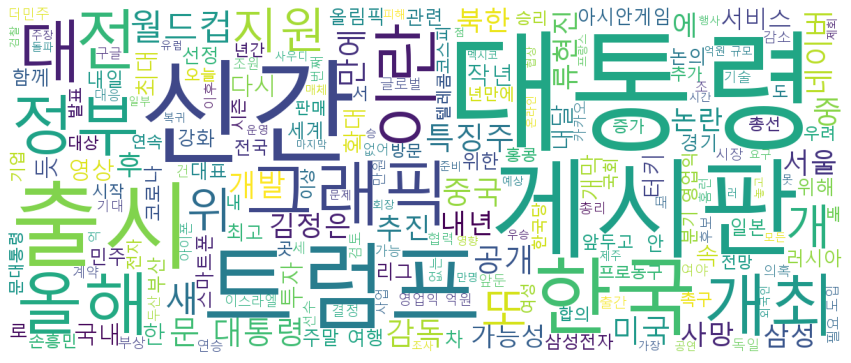

In [37]:
# content를 위에서 만든 함수인 display_word_cloud로 워드클라우드를 시각화 해봅니다.
display_word_cloud(contents)

## 반복문으로 토픽별 워드클라우드 시각화

In [38]:
# topic 의 unique 값만 보기
df['topic'].unique()

array(['세계', '정치', '스포츠', 'IT과학', '경제', '생활문화', '사회', nan], dtype=object)

In [39]:
# df.loc로 특정 토픽만 가져와서 join으로 문자열을 연결해 줍니다.
topic_text = ' '.join(df.loc[df['topic'] == '세계', 'title'].tolist())

토픽명: IT과학


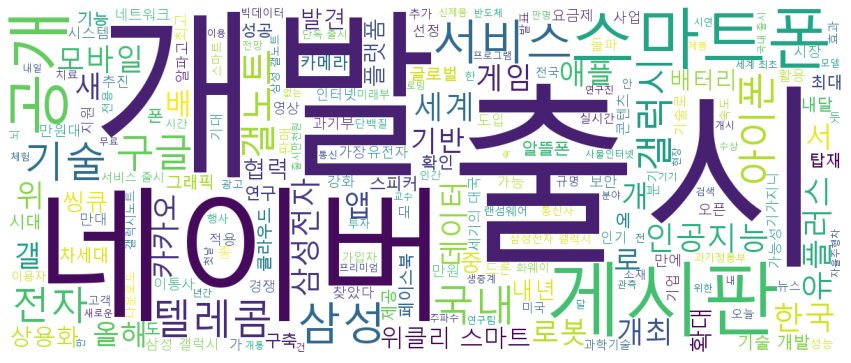

토픽명: 경제


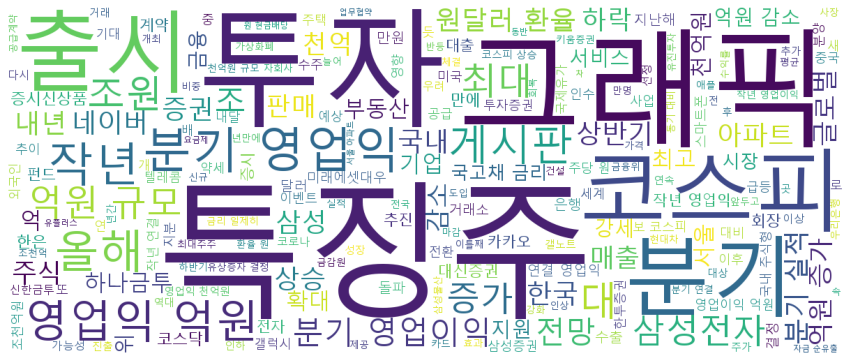

토픽명: 사회


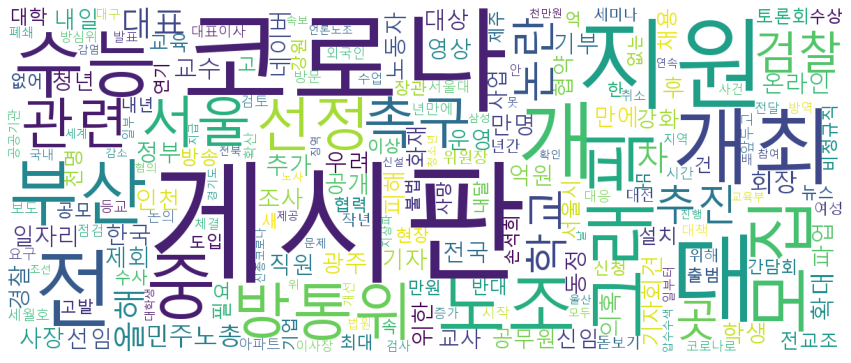

토픽명: 생활문화


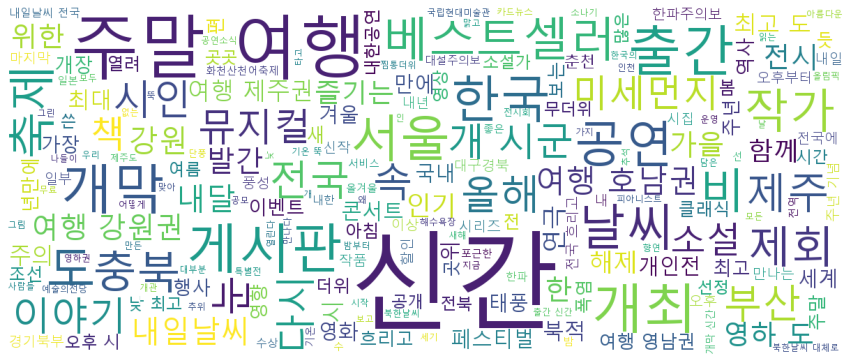

토픽명: 세계


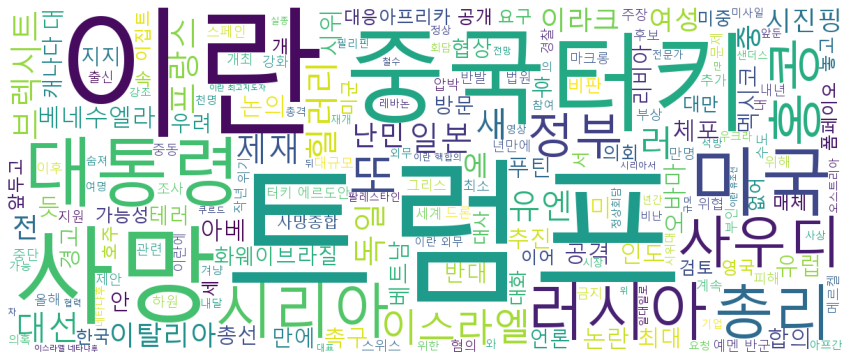

토픽명: 스포츠


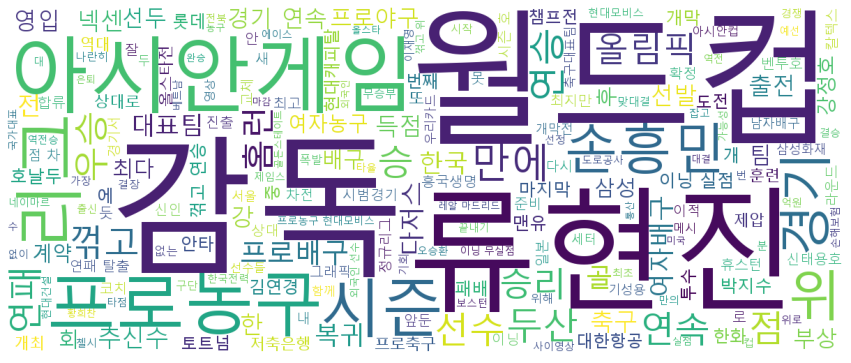

토픽명: 정치


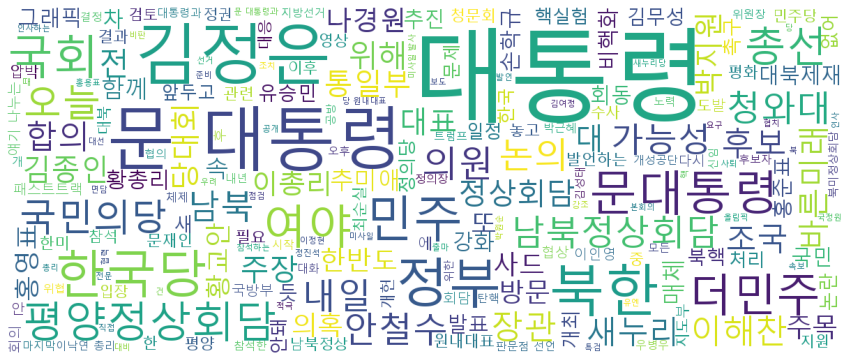

In [40]:
for tp in topic['topic'].tolist():
    print('토픽명:', tp)
    topic_text = ' '.join(df.loc[df['topic'] == tp, 'title'].tolist())
    display_word_cloud(topic_text)

In [41]:
stop_words.extend(['또', '시', '오늘'])

NameError: name 'stop_words' is not defined

In [ ]:
display_word_cloud(contents)